In [2]:
import sys
sys.path.append('..')

import numpy as np
import electrode2currentmap as e2cm
import effectivecurrent2brightness as ec2b
from utils import TimeSeries
import matplotlib.pyplot as plt
%matplotlib inline

In [179]:
delays = np.linspace(0, 50, 6)/1000.

In [180]:
delays

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05])

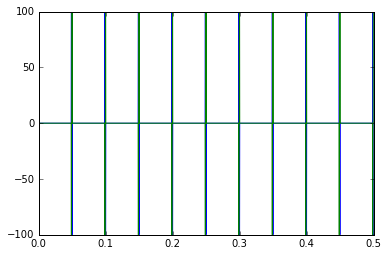

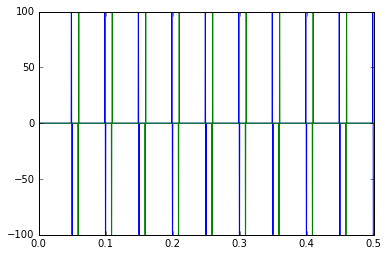

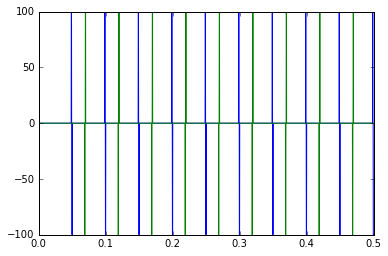

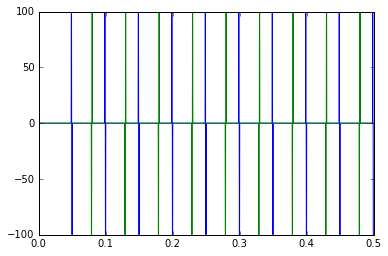

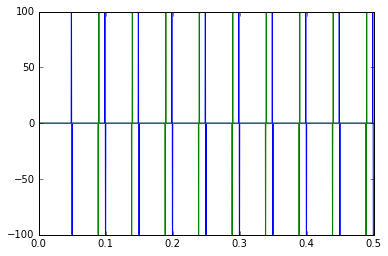

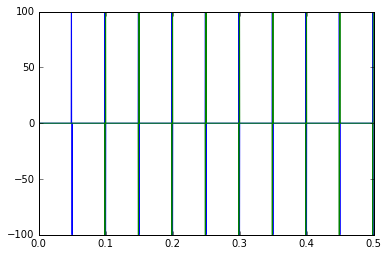

In [199]:
for d in delays:
    plt.figure()
    s1 = e2cm.Psycho2Pulsetrain(freq=20, dur=0.5, pulse_dur=.5/1000.,
                                interphase_dur=.5/1000., delay=0.,
                                tsample=.1/1000., current_amplitude=100,
                                pulsetype='cathodicfirst')

    s2 = e2cm.Psycho2Pulsetrain(freq=20, dur=0.5, pulse_dur=.5/1000.,
                                interphase_dur=.5/1000., delay=d,
                                tsample=.1/1000., current_amplitude=100,
                                pulsetype='anodicfirst')

    plt.plot(s1.time, s1.data)
    plt.plot(s1.time, s2.data)

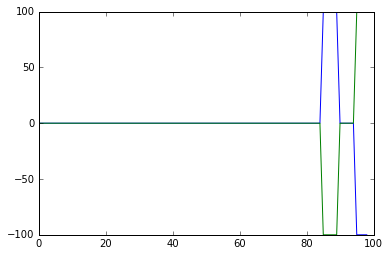

In [203]:
plt.plot(s1.data[np.where((s1.time > 0.14) & (s1.time < 0.1500))])
plt.plot(s2.data[np.where((s1.time > 0.14) & (s1.time < 0.1500))])

In [138]:
xlo = -1000
xhi = 1000 
ylo = -1000
yhi = 1000

In [139]:
r = e2cm.Retina(axon_map='../axon.npz', xlo=xlo, xhi=xhi, ylo=ylo, yhi=yhi)

In [140]:
radius = 100

In [143]:
positions = np.linspace(xlo + radius, xhi-radius, 10)

In [144]:
positions

array([-900., -700., -500., -300., -100.,  100.,  300.,  500.,  700.,  900.])

In [145]:
import itertools as it

In [146]:
xy = list(it.product(positions, positions))

In [147]:
xy[0], xy[1]

((-900.0, -900.0), (-900.0, -700.0))

In [148]:
combos = np.array(list((it.combinations(xy, 2))))

In [187]:
i = -1

In [188]:
electrode_array = e2cm.ElectrodeArray([100, 100], [combos[i, 0, 0], combos[i, 1, 0]], [combos[i, 0, 1], combos[i, 1, 1]])

In [189]:
#ecm = r.ecm(ea2, [s1, s2])

ecs_list, cs_list = r.electrode_ecs(electrode_array)
#ecs_list = r.electrode_ecs(ea2)
tm1 = ec2b.TemporalModel()

percept = ec2b.pulse2percept(tm1, ecs_list, r, [s1, s2], subsample_factor=444)

# sr = np.zeros(r.gridx.shape + (11493, ))
# fr = np.zeros(r.gridx.shape + (6778, ))
# ca = np.zeros(r.gridx.shape + (11493, ))
# sn = np.zeros(r.gridx.shape + (11493, ))

# for xx in range(r.gridx.shape[0]):
#     for yy in range(r.gridx.shape[1]):
#         ecm = r.ecm(xx, yy, ecs_list, [s1, s2])
#         fr[xx, yy] = tm1.fast_response(ecm).data
#         ca[xx, yy] = tm1.charge_accumulation(TimeSeries(ecm.tsample, fr[xx, yy]), ecm).data
#         sn[xx, yy] = tm1.stationary_nonlinearity(TimeSeries(ecm.tsample, ca[xx, yy])).data
#         sr[xx, yy] = tm1.slow_response(TimeSeries(ecm.tsample, sn[xx, yy])).data[:sr.shape[-1]]

# sr = TimeSeries(ecm.tsample, sr)
# sr.resample(25)

#for i in range(sr.data.shape[-1]):
#     fig, ax = plt.subplots(1)
#     ax.matshow(sr.data[:, :, i], cmap='viridis', vmax=sr.data.max(),
#                vmin=sr.data.min())
#     fig.savefig('/Users/arokem/tmp/figures-tmp/fig%03d' % i)
#     plt.close("all")

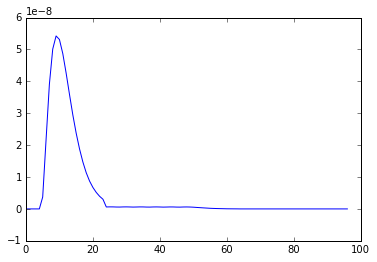

In [190]:
plt.plot(percept.data[0, 0])

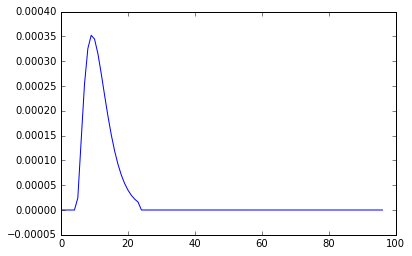

In [191]:
plt.plot(percept.data[40, 40])

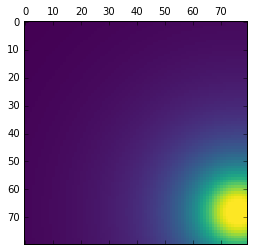

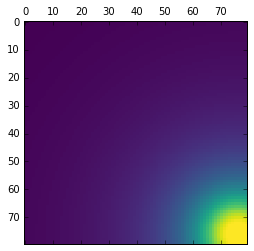

In [192]:
plt.matshow(electrode_array.electrodes[0].current_spread(r.gridx, r.gridy), cmap='viridis')
plt.matshow(electrode_array.electrodes[1].current_spread(r.gridx, r.gridy), cmap='viridis')

In [193]:
idx = np.where(percept.data==np.max(percept.data))

In [194]:
idx

(array([59]), array([63]), array([11]))

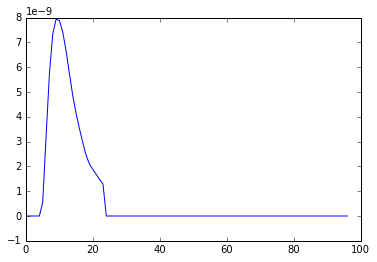

In [195]:
plt.plot(np.min(percept.data, axis=(0, 1)))

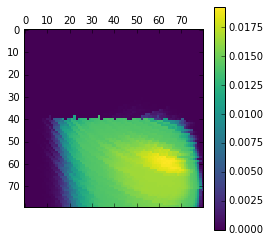

In [196]:
plt.matshow(percept.data[:, :, idx[-1][0]], cmap='viridis', 
            vmax=np.max(percept.data), vmin=np.min(percept.data))
plt.colorbar()